### MDVR-KCL experiments using the segmented wav files. (13 mfcc + acoustic features)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import auc
#from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [3]:
# only acoustic features
df = pd.read_csv("../MDVR_all_features_chunks.csv")
#df = shuffle(df)
#df.reset_index(inplace=True, drop=True)
df.drop(['voiceID', 'label_x'], inplace = True, axis = 1)
df.rename(columns={'label_y':'label'}, inplace=True)

df['label'].value_counts()
df.head()

len(df)
df.columns

Index(['meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter',
       'rapJitter', 'ppq5Jitter', 'localShimmer', 'localdbShimmer',
       'apq3Shimmer', 'apq5Shimmer', 'mfcc_feature0', 'mfcc_feature1',
       'mfcc_feature2', 'mfcc_feature3', 'mfcc_feature4', 'mfcc_feature5',
       'mfcc_feature6', 'mfcc_feature7', 'mfcc_feature8', 'mfcc_feature9',
       'mfcc_feature10', 'mfcc_feature11', 'mfcc_feature12', 'label'],
      dtype='object')

In [4]:
#drop rows wth na
df = df.dropna()
len(df)
df

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,231.250953,45.480073,16.525302,0.027821,0.000121,0.011726,0.011947,0.085180,0.922601,0.028993,...,24.552747,-20.110619,-94.736717,-55.245548,-2.910492,-22.578827,-8.833281,4.481475,-7.786104,0
1,201.477299,14.236377,18.961886,0.014327,0.000071,0.006781,0.007266,0.075751,0.843053,0.021091,...,55.259625,-9.692891,-87.940073,-53.553243,-15.094735,-5.031696,1.086642,12.303356,-6.256570,0
2,209.285317,29.051820,12.840174,0.029609,0.000143,0.013380,0.009806,0.078756,0.813759,0.028769,...,50.166589,27.302583,-78.536637,-88.946175,-17.807079,-26.052948,4.212388,15.374215,-22.268039,0
3,221.819604,31.556270,16.250999,0.027461,0.000123,0.012908,0.015317,0.088893,0.941172,0.033405,...,34.791814,-3.472786,-99.235397,-67.622613,0.790294,-12.970583,2.264660,1.247783,-29.259117,0
4,199.675876,6.519508,14.700531,0.026505,0.000134,0.014263,0.016973,0.078197,0.684674,0.030303,...,-1.658086,-28.638360,-119.038394,-29.546933,35.435261,-17.023488,-14.687500,16.904188,9.033225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,195.347573,3.898871,16.031184,0.015449,0.000079,0.007649,0.009837,0.105253,1.159898,0.030603,...,-19.489413,36.202501,-12.024058,-31.619932,-27.050083,0.008420,-2.687716,-36.327416,-7.040984,1
812,202.670234,19.536584,16.369083,0.015260,0.000076,0.007204,0.006306,0.054645,0.518385,0.020535,...,7.578952,35.383236,-21.173209,-39.841536,-47.107387,1.869901,10.608157,-5.297793,-22.543747,1
813,186.407006,14.370029,15.624512,0.021293,0.000114,0.011290,0.010155,0.066981,0.627914,0.029828,...,40.402198,39.211555,-33.991202,-31.252842,-36.273257,-5.828548,19.337134,-11.712576,-29.476929,1
814,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.063512,0.622949,0.024778,...,12.883081,28.696040,-27.721696,-25.856546,-38.773029,7.435858,17.053259,-9.497502,-19.095361,1


In [5]:
#separate dependent and independent variable for acoustic features only
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1]
df_Y = df.iloc[:,-1]

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)
X

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature3,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12
0,231.250953,45.480073,16.525302,0.027821,0.000121,0.011726,0.011947,0.085180,0.922601,0.028993,...,69.157752,24.552747,-20.110619,-94.736717,-55.245548,-2.910492,-22.578827,-8.833281,4.481475,-7.786104
1,201.477299,14.236377,18.961886,0.014327,0.000071,0.006781,0.007266,0.075751,0.843053,0.021091,...,71.862204,55.259625,-9.692891,-87.940073,-53.553243,-15.094735,-5.031696,1.086642,12.303356,-6.256570
2,209.285317,29.051820,12.840174,0.029609,0.000143,0.013380,0.009806,0.078756,0.813759,0.028769,...,73.061485,50.166589,27.302583,-78.536637,-88.946175,-17.807079,-26.052948,4.212388,15.374215,-22.268039
3,221.819604,31.556270,16.250999,0.027461,0.000123,0.012908,0.015317,0.088893,0.941172,0.033405,...,61.590851,34.791814,-3.472786,-99.235397,-67.622613,0.790294,-12.970583,2.264660,1.247783,-29.259117
4,199.675876,6.519508,14.700531,0.026505,0.000134,0.014263,0.016973,0.078197,0.684674,0.030303,...,22.476925,-1.658086,-28.638360,-119.038394,-29.546933,35.435261,-17.023488,-14.687500,16.904188,9.033225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,195.347573,3.898871,16.031184,0.015449,0.000079,0.007649,0.009837,0.105253,1.159898,0.030603,...,37.965771,-19.489413,36.202501,-12.024058,-31.619932,-27.050083,0.008420,-2.687716,-36.327416,-7.040984
812,202.670234,19.536584,16.369083,0.015260,0.000076,0.007204,0.006306,0.054645,0.518385,0.020535,...,18.847136,7.578952,35.383236,-21.173209,-39.841536,-47.107387,1.869901,10.608157,-5.297793,-22.543747
813,186.407006,14.370029,15.624512,0.021293,0.000114,0.011290,0.010155,0.066981,0.627914,0.029828,...,28.429428,40.402198,39.211555,-33.991202,-31.252842,-36.273257,-5.828548,19.337134,-11.712576,-29.476929
814,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.063512,0.622949,0.024778,...,39.590882,12.883081,28.696040,-27.721696,-25.856546,-38.773029,7.435858,17.053259,-9.497502,-19.095361


In [6]:
# Scale for acoustic features
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.154648,0.012578,0.787054,0.045324,0.065681,0.049453,0.027517,0.117502,0.140266,0.171648,...,0.743756,0.579216,0.631875,0.667090,0.454574,0.576176,0.468706,0.706576,0.489025,0.246530
1,0.359383,0.138233,0.527694,0.146881,0.118045,0.124615,0.059992,0.208179,0.392777,0.114899,...,0.506395,0.560750,0.483156,0.515593,0.627266,0.448106,0.395279,0.654975,0.339576,0.334736
2,0.266854,0.158108,0.644371,0.082157,0.082628,0.042779,0.024084,0.126883,0.194980,0.143321,...,0.626660,0.534571,0.539082,0.612244,0.467991,0.470291,0.517531,0.368554,0.311654,0.595627
3,0.989576,0.300506,0.481678,0.665703,0.253371,0.560716,0.625995,0.457918,0.610710,0.501694,...,0.934991,0.689354,0.835076,0.826577,0.950486,0.865280,0.947476,0.792832,0.766656,0.851771
4,0.492156,0.149232,0.118242,0.243871,0.159527,0.185294,0.106677,0.324000,0.515990,0.199637,...,0.573677,0.574552,0.680521,0.621597,0.475369,0.261781,0.656702,0.611583,0.536267,0.605006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.274639,0.178036,0.705424,0.134340,0.129217,0.107191,0.050935,0.235467,0.330539,0.297956,...,0.781331,0.612277,0.470565,0.574649,0.492063,0.589642,0.557711,0.462126,0.157351,0.259953
561,0.179311,0.269568,0.364460,0.209696,0.250382,0.185847,0.066050,0.194868,0.300701,0.267327,...,0.751410,0.509658,0.561152,0.658546,0.346365,0.612854,0.558225,0.552814,0.461749,0.586444
562,0.079025,0.059888,0.477472,0.110413,0.186168,0.065168,0.034257,0.129020,0.184829,0.147221,...,0.550999,0.751190,0.779632,0.702464,0.497471,0.721851,0.595840,0.496642,0.266940,0.646817
563,0.144036,0.093019,0.734637,0.153207,0.206145,0.132728,0.085890,0.159813,0.276885,0.171980,...,0.667544,0.759388,0.649174,0.686575,0.628691,0.657289,0.384204,0.098568,0.427940,0.673668


In [7]:
###### KNNN ###########
# Fit classifier to the Training set
#KNN
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print("Classification Accuracy: ", accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

Classification Accuracy:  88.47736625514403
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       137
           1       0.91      0.82      0.86       106

    accuracy                           0.88       243
   macro avg       0.89      0.88      0.88       243
weighted avg       0.89      0.88      0.88       243

0.8775306431620989
[1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0]
[[128   9]
 [ 19  87]]


In [8]:
#### SVM
import matplotlib.pyplot as plt
model_svm = svm.SVC()
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm = ((conf_matrix_svm[0,0] + conf_matrix_svm[1,1])/(conf_matrix_svm[0,0] +conf_matrix_svm[0,1]+conf_matrix_svm[1,0]+conf_matrix_svm[1,1]))*100


print("Classification Accuracy: ", accuracy_svm)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm))

print(y_pred_svm)

print(conf_matrix_svm)

Classification Accuracy:  81.89300411522635
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       137
           1       0.89      0.67      0.76       106

    accuracy                           0.82       243
   macro avg       0.84      0.80      0.81       243
weighted avg       0.83      0.82      0.81       243

0.8020589450488912
[0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0]
[[128   9]
 [ 35  71]]


In [9]:
####Decision Tree
import matplotlib.pyplot as plt
model_dt = tree.DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt = ((conf_matrix_dt[0,0] + conf_matrix_dt[1,1])/(conf_matrix_dt[0,0] +conf_matrix_dt[0,1]+conf_matrix_dt[1,0]+conf_matrix_dt[1,1]))*100


print("Classification Accuracy: ", accuracy_dt)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_dt)

print(conf_matrix_dt)

Classification Accuracy:  76.95473251028807
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       137
           1       0.91      0.82      0.86       106

    accuracy                           0.88       243
   macro avg       0.89      0.88      0.88       243
weighted avg       0.89      0.88      0.88       243

0.8775306431620989
[0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[[112  25]
 [ 31  75]]


In [10]:
####Niaves Bayes
model_nb = GaussianNB()
model_nb = model_nb.fit(X_train, y_train)


y_pred_nb = model_nb.predict(X_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_nb = ((conf_matrix_nb[0,0] + conf_matrix_nb[1,1])/(conf_matrix_nb[0,0] +conf_matrix_nb[0,1]+conf_matrix_nb[1,0]+conf_matrix_nb[1,1]))*100


print("CLassifictaion Accuracy:", accuracy_nb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_nb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_nb))

print(y_pred_nb)

print(conf_matrix_nb)


CLassifictaion Accuracy: 70.78189300411523
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       137
           1       0.71      0.57      0.63       106

    accuracy                           0.71       243
   macro avg       0.71      0.69      0.69       243
weighted avg       0.71      0.71      0.70       243

0.6917779920121194
[0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[112  25]
 [ 46  60]]


In [11]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf = ((conf_matrix_rf[0,0] + conf_matrix_rf[1,1])/(conf_matrix_rf[0,0] +conf_matrix_rf[0,1]+conf_matrix_rf[1,0]+conf_matrix_rf[1,1]))*100


print("CLassification Accuracy: ", accuracy_rf)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_rf))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_rf))

print(y_pred_rf)

print(conf_matrix_rf)

CLassification Accuracy:  81.48148148148148
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       137
           1       0.84      0.71      0.77       106

    accuracy                           0.81       243
   macro avg       0.82      0.80      0.81       243
weighted avg       0.82      0.81      0.81       243

0.8026786943947115
[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
[[123  14]
 [ 31  75]]


In [12]:
data = {
    'ML Alg': ['KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [accuracy_knn, accuracy_svm, accuracy_dt, accuracy_nb, accuracy_rf]
}
#df = pd.DataFrame(data)
df_results = pd.DataFrame(data)
df_results


,ML Alg,Accuracy
0,KNN,88.477366
1,SVM,81.893004
2,Decision Tree,76.954733
3,Naive Bayes,70.781893
4,Random Forest,81.481481


#### K Fold Evaluation

In [13]:
def kfold_eval(alg):
    df_X = df.iloc[:, :-1].values
    df_Y = df.iloc[:,-1].values
    
    df_X = pd.DataFrame(df_X)
    df_Y = pd.DataFrame(df_Y)

    parts = 6
    kfold = KFold(parts, shuffle=True)
    
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    precision_list =[]
    f1_knn_list = []
    
    for i in range(1, 11):
        accuracy_total = 0
        sensitivity_total =0
        specificity_total=0
        precision_total=0
        f1_knn_total=0
        
        for train, test in kfold.split(df_X,df_Y):
            Xtrain = df_X.iloc[train, :]
            #print(Xtrain)
            Ytrain = df_Y.iloc[train, :]
            #print(Ytrain)
            Xtest = df_X.iloc[test, :]
            Ytest = df_Y.iloc[test, :]
            #scale
            sc = MinMaxScaler()
            Xtrain = sc.fit_transform(Xtrain)
            Xtest = sc.transform(Xtest)
            
            #modelling
            if (alg == "LR"):
                model = LogisticRegression()
            elif (alg == "GB"):
                model = GradientBoostingClassifier(learning_rate= 0.5, max_depth=1,n_estimators=3)
            elif (alg == "KNN"):
                model = KNeighborsClassifier(n_neighbors = 10)
            elif (alg == "SVM"):
                model = svm.SVC()
            elif (alg == "DT"):
                model = tree.DecisionTreeClassifier()
            elif (alg == "NB"):
                model =  GaussianNB()
            elif (alg == "RF"):
                model = RandomForestClassifier()
                
            model.fit(Xtrain, Ytrain)
            y_pred = model.predict(Xtest)

            conf_matrix = confusion_matrix(Ytest, y_pred)
            #print(conf_matrix)
            TN = conf_matrix[0][0]
            FP = conf_matrix[0][1]
            FN = conf_matrix[1][0]
            TP = conf_matrix[1][1]
            #print(TN, ", ", FP, ", ", FN, ", ", TP)

            accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
            sensitivity = (TP/(TP+FN)) * 100 #recall
            specificity = (TN/(TN + FP)) * 100
            precision = (TP/(TP+FP)) * 100
            f1_knn = 2 *((sensitivity * precision)/(sensitivity + precision))
            
            #sum it up
            accuracy_total += accuracy
            sensitivity_total += sensitivity
            specificity_total += specificity
            precision_total += precision
            f1_knn_total += f1_knn
            
            #avg
            accuracy_mean = accuracy_total/parts
            sensitivity_mean = sensitivity_total/parts
            specificity_mean = specificity_total/parts
            precision_mean = precision_total/parts
            f1_mean = f1_knn_total/parts
            
        #print("Loop ", i, "\n Mean Accuracy: ", accuracy_total/parts,
                           #  "\n Mean sensitivity: ",sensitivity_total/parts,
                            # "\n Mean Specificity: ", specificity_total/parts,
                             #"\n Mean Precision: ",precision_total/parts,
                             #"\n Mean f1: ",f1_knn_total/parts)
        accuracy_list.append(accuracy_mean)
        sensitivity_list.append(sensitivity_mean)
        specificity_list.append(specificity_mean)
        precision_list.append(precision_mean)
        f1_knn_list.append(f1_mean)
        
    print(alg)
    print("Accuracy for the 10 iterations: ",  accuracy_list) #mean accuracy acros the 6 folds for each iteration
    print("Average accuracy: ", np.mean(accuracy_list), "\n")
    
    print("Sensitivity for the 10 iterations: ",  sensitivity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average sensitivity: ", np.mean(sensitivity_list), "\n")
        
    print("Specificity for the 10 iterations: ",  specificity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average specificity: ", np.mean(specificity_list), "\n")
    
    print("Precision for the 10 iterations: ",  precision_list) 
    print("Average precision: ", np.mean(precision_list), "\n")
    
    print("F1  score for the 10 iterations: ",  f1_knn_list) 
    print("Average f1 score: ", np.mean(f1_knn_list), "\n")
       
    
        
    

In [14]:

kfold_eval("KNN")

print("\n")
kfold_eval("DT")

print("\n")
kfold_eval("SVM")

print("\n")
kfold_eval("NB")

print("\n")
kfold_eval("LR")

print("\n")
kfold_eval("GB")

print("\n")
kfold_eval("RF")






C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

KNN
Accuracy for the 10 iterations:  [91.7099686751428, 90.47908605122537, 91.4584484982495, 90.84484982494934, 91.0889994472084, 90.96462133775567, 91.20784964068547, 90.96277869909711, 90.47816473189607, 91.21337755666114]
Average accuracy:  91.04081444628709 

Sensitivity for the 10 iterations:  [86.47591001223454, 84.59712555124595, 86.83664374840845, 85.12090913909816, 85.86509165069536, 84.47462326824241, 85.82820305171134, 85.77739247544146, 84.90968692296232, 85.93674477796095]
Average sensitivity:  85.5822330598001 

Specificity for the 10 iterations:  [95.47741926257476, 94.72130047204998, 94.8273102074839, 95.12831223749781, 95.1526707123722, 95.40411011425505, 95.1533088308144, 94.55089425597593, 94.49064311337376, 95.22286231772854]
Average specificity:  95.01288315241263 

Precision for the 10 iterations:  [93.47028384031388, 91.94343869843316, 92.39785778878606, 92.63505474758843, 92.64979196056892, 93.72223076222359, 92.5253556864743, 92.34212700879368, 91.8139336551878

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SVM
Accuracy for the 10 iterations:  [84.78256863829004, 85.88907315275475, 85.87985995946195, 86.01621522019532, 86.99926294453657, 86.25852220379583, 86.26036484245441, 86.01345126220748, 86.51372765800626, 86.87949143173024]
Average accuracy:  86.1492537313433 

Sensitivity for the 10 iterations:  [72.17354472162627, 72.5728450729754, 73.88386618612607, 72.4305369424681, 75.06888474423324, 73.44110916942712, 73.42220920024124, 74.19028080955076, 74.61365878497976, 74.95359224867421]
Average sensitivity:  73.67505278803021 

Specificity for the 10 iterations:  [93.87363793950668, 95.41298673851061, 94.49997898195035, 95.74168653758274, 95.74566936577479, 95.48558116246103, 95.55420276652727, 94.7077009681254, 95.31231255034362, 95.46508080247918]
Average specificity:  95.17988378132618 

Precision for the 10 iterations:  [89.4218245945405, 91.37673317021142, 91.16487559738319, 92.4338051831658, 92.58166531335233, 92.1409463791188, 92.00490280615354, 91.41202426916713, 92.293026397430

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

NB
Accuracy for the 10 iterations:  [73.87414777962043, 74.00866040169522, 73.27068361894233, 73.14262023217246, 73.39045513174865, 73.26976229961305, 72.89478533259627, 74.00221116639027, 73.38308457711442, 73.02284871936614]
Average accuracy:  73.42592592592592 

Sensitivity for the 10 iterations:  [68.24638127086047, 67.00865749943183, 66.55040178846832, 64.95543527313897, 66.85846560846561, 67.71783335677102, 66.18780542716762, 67.05474649922904, 65.34697631673215, 66.4429273406889]
Average sensitivity:  66.63696303809539 

Specificity for the 10 iterations:  [78.12832097621254, 79.13491843344164, 78.18085857047129, 78.75118328314674, 78.30070711546985, 76.71123976271035, 77.8866713195721, 79.26110071608579, 79.1246009567799, 77.73816897045104]
Average specificity:  78.32177701043413 

Precision for the 10 iterations:  [70.24979626927706, 70.22568438166395, 68.64405236100403, 69.29557389347337, 68.83947347439342, 68.43195599262792, 68.71219974036525, 70.56479416986663, 69.707603631

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LR
Accuracy for the 10 iterations:  [79.82587064676618, 80.0764695043302, 79.46102819237147, 80.56569006817764, 79.33480744426019, 79.58448498249494, 80.44315459738345, 80.07370554634237, 79.82587064676618, 79.94564215957251]
Average accuracy:  79.91367237884651 

Sensitivity for the 10 iterations:  [68.24225879190419, 68.713051273154, 68.18940350349517, 70.15126675357587, 68.07715310543495, 68.60690991980302, 68.84637006587234, 68.85353164547047, 69.21126264418562, 68.6279672718726]
Average sensitivity:  68.75191749747682 

Specificity for the 10 iterations:  [88.4563906807647, 88.38123793292424, 88.02762884952308, 88.2587419253186, 87.46787037013706, 87.9146876473876, 88.76140025425798, 88.04916009565495, 87.90489946392871, 87.81529271039318]
Average specificity:  88.10373099302902 

Precision for the 10 iterations:  [80.80576763953904, 80.72751819403885, 80.4233392353597, 81.21302821105265, 79.6097994753457, 80.31799363238507, 81.40743810956576, 80.74580660644595, 80.57486263291474,

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GB
Accuracy for the 10 iterations:  [75.24967753823475, 75.24322830292981, 75.616362631288, 74.8793071678644, 75.62373318592223, 75.86604016952275, 75.61728395061728, 75.23677906762484, 75.37221300902893, 75.73889810208219]
Average accuracy:  75.44435231251151 

Sensitivity for the 10 iterations:  [48.31680564946285, 47.53855050928999, 47.47032509941147, 47.987040566456415, 47.8849438064384, 47.52963370283769, 47.253004798074365, 47.94160975508391, 47.663642423579496, 48.680144505123344]
Average sensitivity:  47.826570081575795 

Specificity for the 10 iterations:  [94.65862573099413, 95.3578004806497, 95.90468041687554, 94.3739273814371, 95.53562314774199, 96.34602626953283, 96.05720255359057, 95.15014894999138, 95.49785414806536, 95.45181534730425]
Average specificity:  95.43337044261827 

Precision for the 10 iterations:  [86.70473294129208, 87.70978462788808, 89.59808941497748, 86.38816380751865, 87.87694720154396, 90.86528303679837, 89.04797589078369, 89.0991235203759, 88.65819118

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RF
Accuracy for the 10 iterations:  [86.62612861617838, 86.51096370001842, 88.73502856089921, 87.62483876911737, 87.01031877648792, 87.37423991155333, 87.37239727289479, 86.7551133222775, 87.62483876911739, 87.61746821448314]
Average accuracy:  87.32513359130273 

Sensitivity for the 10 iterations:  [77.76342855521021, 77.34634753077084, 80.27367041603044, 78.58404610651081, 77.54441439786268, 77.73086842550313, 79.6615147535501, 79.088117186429, 80.33884521550556, 79.44592249855408]
Average sensitivity:  78.77771750859269 

Specificity for the 10 iterations:  [93.12472349137259, 93.77835351158878, 94.83765888548834, 94.4373175523189, 93.90290086683554, 94.2423117807411, 93.0440813289058, 92.39620924343147, 93.06145089716381, 93.96922837175292]
Average specificity:  93.67942359295992 

Precision for the 10 iterations:  [89.31509377338291, 89.87602599190745, 91.89190707453362, 90.59856495573138, 90.04311869675406, 89.97912831741705, 89.04312603277405, 88.22759268196877, 89.0362794074418

In [15]:
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import MinMaxScaler
from sklearn.metrics           import accuracy_score
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.svm               import SVC
from sklearn.tree              import DecisionTreeClassifier
from sklearn.naive_bayes       import GaussianNB
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base              import clone
import pandas as pd

# 1) Define your models
models = {
    'KNN':               KNeighborsClassifier(n_neighbors=10),
    'SVM':               SVC(),
    'Decision Tree':     DecisionTreeClassifier(),
    'Naive Bayes':       GaussianNB(),
    'Random Forest':     RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 2) Split & scale once for each model’s baseline
X_tr, X_te, y_tr, y_te = train_test_split(df_X, df_Y,
                                         test_size=0.3,
                                         random_state=0)

scaler = MinMaxScaler().fit(X_tr)
X_train_all = scaler.transform(X_tr)
X_test_all  = scaler.transform(X_te)

# 3) Loop over models & features
records = []
for name, base_model in models.items():
    # baseline accuracy
    m0      = clone(base_model)
    m0.fit(X_train_all, y_tr)
    base_acc = accuracy_score(y_te, m0.predict(X_test_all))
    
    # ablate each feature
    for feat in df_X.columns:
        # drop feature
        Xtr_drop = X_tr.drop(columns=[feat])
        Xte_drop = X_te.drop(columns=[feat])
        # re-scale
        sc2    = MinMaxScaler().fit(Xtr_drop)
        Xtr_s  = sc2.transform(Xtr_drop)
        Xte_s  = sc2.transform(Xte_drop)
        # retrain & eval
        m = clone(base_model)
        m.fit(Xtr_s, y_tr)
        acc = accuracy_score(y_te, m.predict(Xte_s))
        records.append({
            'model':           name,
            'feature_removed': feat,
            'accuracy':        acc,
            'delta_vs_base':   acc - base_acc
        })

# 4) Build & show results
ablation_all = pd.DataFrame(records)

# show worst drops across all
print(ablation_all.sort_values('delta_vs_base').head(10))

# optional pivot
wide = ablation_all.pivot(index='feature_removed',
                          columns='model',
                          values='delta_vs_base')
print("\nΔ accuracy vs baseline (rows=features, cols=models):")
print(wide.to_string())


                 model feature_removed  accuracy  delta_vs_base
48       Decision Tree        meanF0Hz  0.699588      -0.082305
44                 SVM   mfcc_feature9  0.773663      -0.045267
66       Decision Tree   mfcc_feature7  0.740741      -0.041152
133  Gradient Boosting   mfcc_feature2  0.761317      -0.041152
46                 SVM  mfcc_feature11  0.781893      -0.037037
47                 SVM  mfcc_feature12  0.786008      -0.032922
20                 KNN   mfcc_feature9  0.851852      -0.032922
37                 SVM   mfcc_feature2  0.790123      -0.028807
41                 SVM   mfcc_feature6  0.790123      -0.028807
141  Gradient Boosting  mfcc_feature10  0.773663      -0.028807

Δ accuracy vs baseline (rows=features, cols=models):
model                Decision Tree  Gradient Boosting       KNN  Naive Bayes  Random Forest       SVM
feature_removed                                                                                      
HNR                      -0.020576    

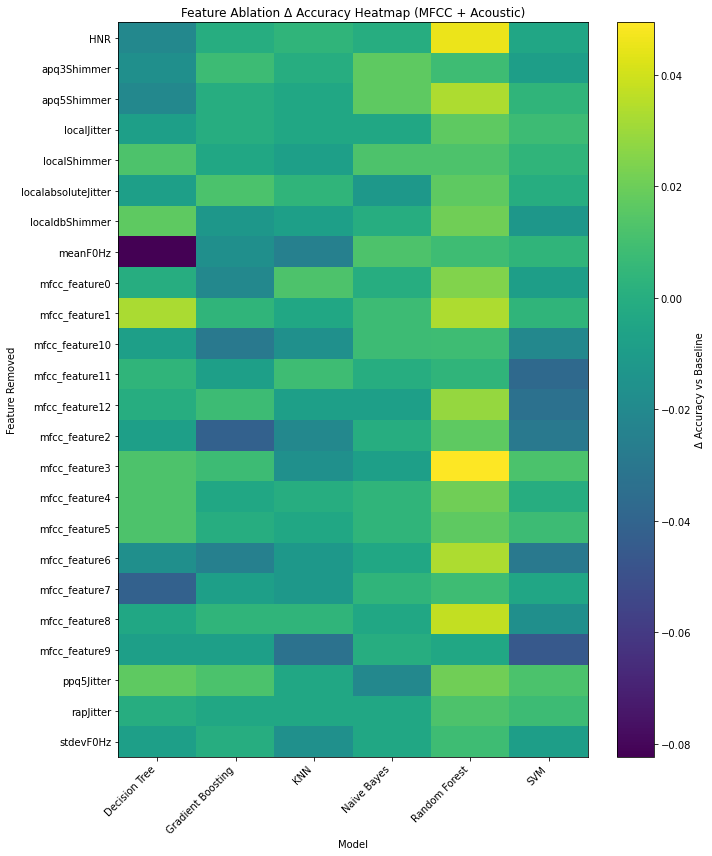

In [16]:
import matplotlib.pyplot as plt

wide = ablation_all.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)

plt.figure(figsize=(10, 12))
plt.imshow(wide.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide.columns)), wide.columns, rotation=45, ha='right')
plt.yticks(range(len(wide.index)), wide.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap (MFCC + Acoustic)')
plt.tight_layout()
plt.show()



Top 10 worst Δ accuracy drops (model × feature):
            model feature_removed  avg_accuracy  delta_vs_base
              SVM        meanF0Hz      0.740181      -0.043271
Gradient Boosting   mfcc_feature6      0.840357      -0.032198
    Decision Tree        meanF0Hz      0.743877      -0.032114
Gradient Boosting        meanF0Hz      0.841584      -0.030972
              KNN        meanF0Hz      0.804455      -0.028502
              SVM   mfcc_feature1      0.757465      -0.025987
Gradient Boosting   mfcc_feature2      0.847780      -0.024776
Gradient Boosting   mfcc_feature4      0.854007      -0.018549
Gradient Boosting   mfcc_feature0      0.854014      -0.018542
Gradient Boosting   mfcc_feature3      0.856491      -0.016065


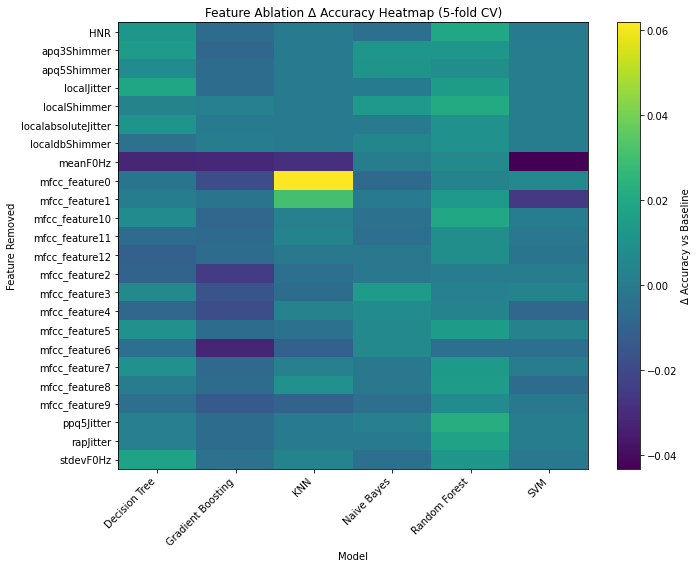

In [ ]:
## With 5 fold CV

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection   import cross_val_score, StratifiedKFold
from sklearn.preprocessing     import MinMaxScaler
from sklearn.base              import clone
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.svm               import SVC
from sklearn.tree              import DecisionTreeClassifier
from sklearn.naive_bayes       import GaussianNB
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier

models = {
    'KNN':               KNeighborsClassifier(n_neighbors=10),
    'SVM':               SVC(),
    'Decision Tree':     DecisionTreeClassifier(),
    'Naive Bayes':       GaussianNB(),
    'Random Forest':     RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Run cross-validated ablation
records = []
for name, base_model in models.items():
    # baseline avg accuracy via 5-fold CV on all features
    base_acc = cross_val_score(base_model, df_X, df_Y,
                               scoring='accuracy', cv=cv,
                               n_jobs=-1).mean()
    for feat in df_X.columns:
        # drop one feature
        X_drop = df_X.drop(columns=[feat])
        # avg accuracy without that feature
        acc = cross_val_score(base_model, X_drop, df_Y,
                              scoring='accuracy', cv=cv,
                              n_jobs=-1).mean()
        records.append({
            'model':           name,
            'feature_removed': feat,
            'avg_accuracy':    acc,
            'delta_vs_base':   acc - base_acc
        })

#Build results DataFrame
ablation_all = pd.DataFrame(records)

Show 10 worst drops
print("Top 10 worst Δ accuracy drops (model × feature):")
print(ablation_all.sort_values('delta_vs_base').head(10).to_string(index=False))

wide = ablation_all.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)

plt.figure(figsize=(10, 8))
plt.imshow(wide.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide.columns)), wide.columns, rotation=45, ha='right')
plt.yticks(range(len(wide.index)), wide.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap (5-fold CV)')
plt.tight_layout()
plt.show()
